                                             
                                                                  
                                             
                                      Stroke Prediction Analysis
                                      
                                      
                                            

# Importing necessary Libraries and Data 

In [1]:

# Install a pip package in the current Jupyter kernel
# import sys

#!{sys.executable} -m pip install nb-black



import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)


In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)
from datetime import datetime

In [4]:
# Library to split data
from sklearn.model_selection import train_test_split

In [5]:
# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [6]:
# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
   # ###plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    classification_report,
)



## Loading and Exploring the data

In [9]:
# Code to read the CSV file
stroke_data = pd.read_csv(r"C:\Users\Gbeng\OneDrive\Documents\Python Projs\conestoga\stroke\healthcare dataset stroke data.csv")


In [10]:
# let's create a copy of the data to avoid any changes to original data
df = stroke_data.copy()

In [11]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 5110 rows and 12 columns.


In [12]:
# To view column names
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
df.sample(
    10, random_state=2
) 

# setting the random_state will ensure we get the same results every time

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4091,43698,Female,27.00000,0,0,No,Govt_job,Rural,65.43000,27.20000,Unknown,0
3150,69979,Male,73.00000,0,0,Yes,Self-employed,Rural,231.43000,23.00000,smokes,0
2668,43039,Female,63.00000,0,0,Yes,Private,Rural,153.60000,28.00000,formerly smoked,0
793,69427,Female,29.00000,0,0,No,Private,Urban,101.28000,22.70000,never smoked,0
798,46683,Female,25.00000,0,0,No,Private,Urban,122.01000,27.00000,smokes,0
749,34612,Male,55.00000,0,0,Yes,Govt_job,Rural,65.12000,30.00000,never smoked,0
3341,51762,Female,59.00000,0,0,Yes,Private,Rural,134.24000,28.80000,Unknown,0
1179,32645,Female,44.00000,0,0,Yes,Private,Rural,97.59000,30.50000,smokes,0
2356,13620,Female,73.00000,0,0,Yes,Self-employed,Urban,100.49000,23.70000,smokes,0
341,38805,Female,37.00000,0,0,Yes,Private,Rural,75.18000,48.20000,formerly smoked,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observations:

The memory usage is approximately 479.2+ KB. There are numeric (float and int type) and string (object type) columns in the data. We have the following datatypes in the dataframe:

float64(3) int64(4) object(5)

In [15]:
# To view column names
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Observations:

There are 12 columns in the dataset

In [16]:
# Code to view top 5 rows of the data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.00000,0,1,Yes,Private,Urban,228.69000,36.60000,formerly smoked,1
1,51676,Female,61.00000,0,0,Yes,Self-employed,Rural,202.21000,NaN,never smoked,1
2,31112,Male,80.00000,0,1,Yes,Private,Rural,105.92000,32.50000,never smoked,1
3,60182,Female,49.00000,0,0,Yes,Private,Urban,171.23000,34.40000,smokes,1
4,1665,Female,79.00000,1,0,Yes,Self-employed,Rural,174.12000,24.00000,never smoked,1


Observations:

Shows the head of the data (first five rows)

In [17]:
# Code to view last 5 rows of the data
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.00000,1,0,Yes,Private,Urban,83.75000,NaN,never smoked,0
5106,44873,Female,81.00000,0,0,Yes,Self-employed,Urban,125.20000,40.00000,never smoked,0
5107,19723,Female,35.00000,0,0,Yes,Self-employed,Rural,82.99000,30.60000,never smoked,0
5108,37544,Male,51.00000,0,0,Yes,Private,Rural,166.29000,25.60000,formerly smoked,0
5109,44679,Female,44.00000,0,0,Yes,Govt_job,Urban,85.28000,26.20000,Unknown,0


Observations:

Shows the head of the data (last five rows)

In [18]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.00000,NaN,NaN,NaN,36517.82935,21161.72162,67.00000,17741.25000,36932.00000,54682.00000,72940.00000
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.00000,NaN,NaN,NaN,43.22661,22.61265,0.08000,25.00000,45.00000,61.00000,82.00000
hypertension,5110.00000,NaN,NaN,NaN,0.09746,0.29661,0.00000,0.00000,0.00000,0.00000,1.00000
heart_disease,5110.00000,NaN,NaN,NaN,0.05401,0.22606,0.00000,0.00000,0.00000,0.00000,1.00000
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.00000,NaN,NaN,NaN,106.14768,45.28356,55.12000,77.24500,91.88500,114.09000,271.74000
bmi,4909.00000,NaN,NaN,NaN,28.89324,7.85407,10.30000,23.50000,28.10000,33.10000,97.60000


The dataset consists of a longitudinal data of 5110 persons for 2994 females and 2115 males. 4890 out of the 5110 are without stroke while 249 persons are with stroke. From the table above, we the 3 unique values for gender, 2 for ever_married, 5 for work_type, 2 Residence_type and 4 unique smoking_status.

In [19]:
# check the number of unique values in each column of the dataframe
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

Observations:

  It shows the unique data in every column. 

# ## Data Preprocessing

In [20]:

# * Missing value treatment
# * Feature engineering (if needed)
# * Outlier detection and treatment (if needed)
# * Preparing data for modeling
# * Any other preprocessing steps (if needed)

# ### Missing Value Imputation

In [21]:
# checking for missing values
df.isnull().sum().sort_values(ascending=False)

bmi                  201
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
stroke                 0
dtype: int64

Observation:

The above output shows there are 201 null values for column bmi

# #### Calculate the mean and fill the null with the mean value

In [22]:
# Calculate the mean of the BMI column
mean_BMI = df['bmi'].mean()
print(f"mean of BMI column: {mean_BMI}")
# Replace NaN values with the mean value
df['bmi'].fillna(mean_BMI, inplace=True)

mean of BMI column: 28.893236911794673


observation:
    We have replaced the 201 null values in the BMI column. Meaning we have a complete dataset

In [23]:
# checking for missing values
df.isnull().sum().sort_values(ascending=False)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# # Exploratory Data Analysis (EDA)
# * EDA is an important part of any project involving data.
# * It is important to investigate and understand the data better before building a model with it.

In [24]:
def histogram_boxplot_quick(data, feature, figsize=(12, 7), kde=False,bins=None):
    """
   A quick check of the data using a Boxplot and histogram combined in one cell

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    #add col name
    print("Boxplot - Histogram for " + feature.replace('_', ' ') + " based on pre-cleanup of data ")
    plt.show()  # show the plot

Observations: 
    The above code helps to create subplots, boxplot, histogram with statistical information.

In [25]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Observations: 
    The above code helps to create subplots, combined boxplot and histogram with statistical information.

In [26]:
# function to create labeled barplots


def labeled_barplot_quick(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    print("Barplot for " + feature.replace('_', ' ') + " based on pre-cleanup of data ")
    plt.show()  # show the plot

Boxplot - Histogram for id based on pre-cleanup of data 


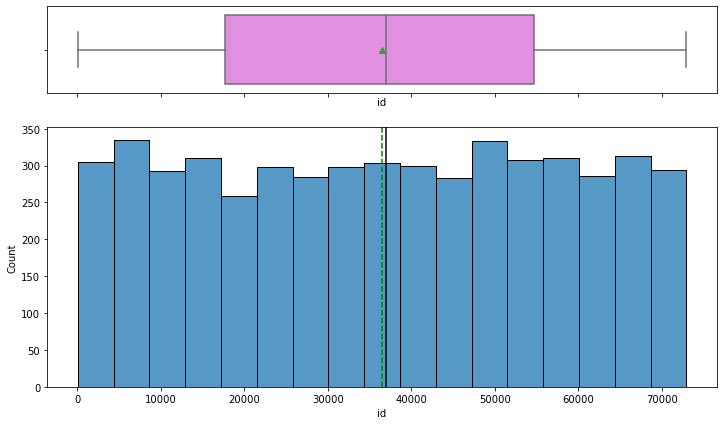

Boxplot - Histogram for age based on pre-cleanup of data 


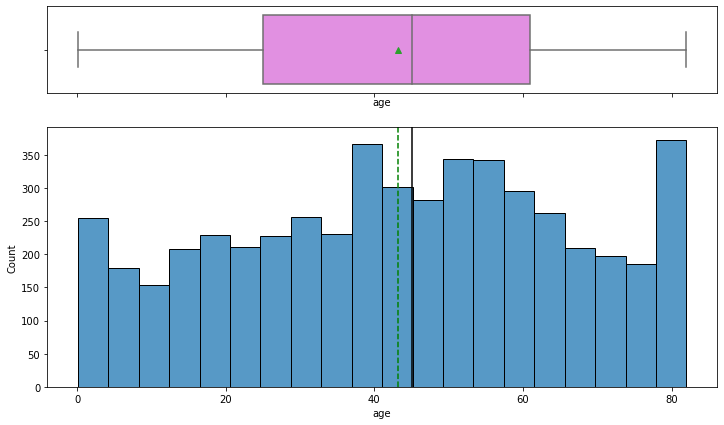

Boxplot - Histogram for hypertension based on pre-cleanup of data 


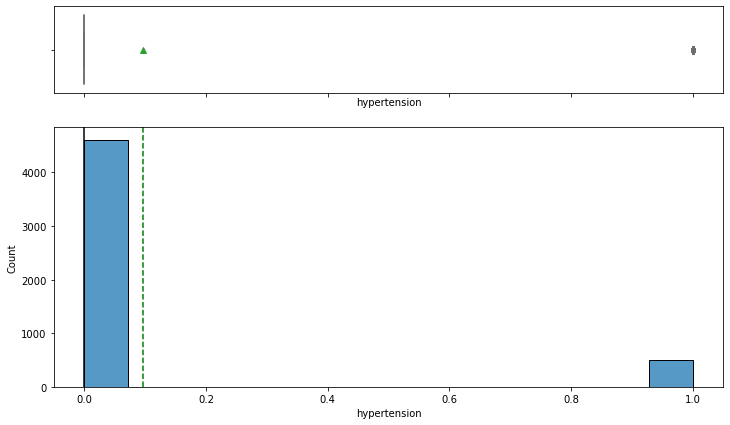

Boxplot - Histogram for heart disease based on pre-cleanup of data 


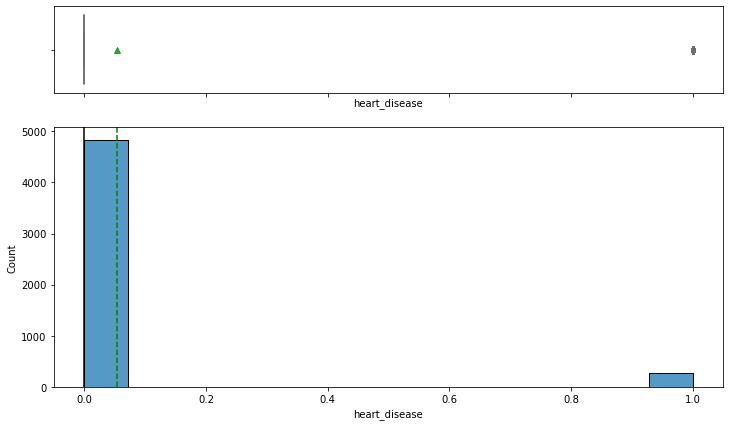

Boxplot - Histogram for avg glucose level based on pre-cleanup of data 


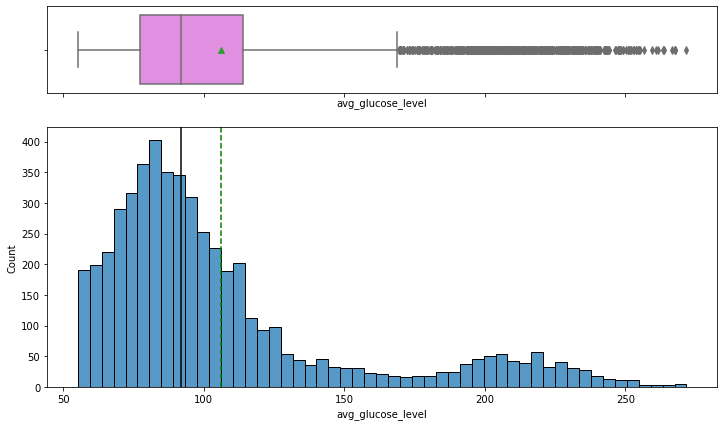

Boxplot - Histogram for bmi based on pre-cleanup of data 


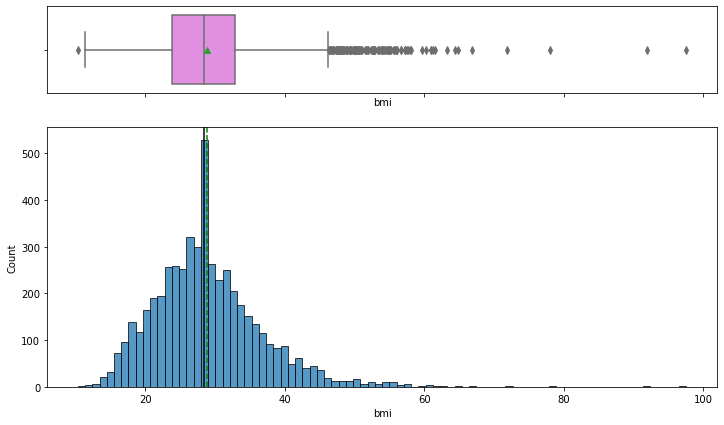

Boxplot - Histogram for stroke based on pre-cleanup of data 


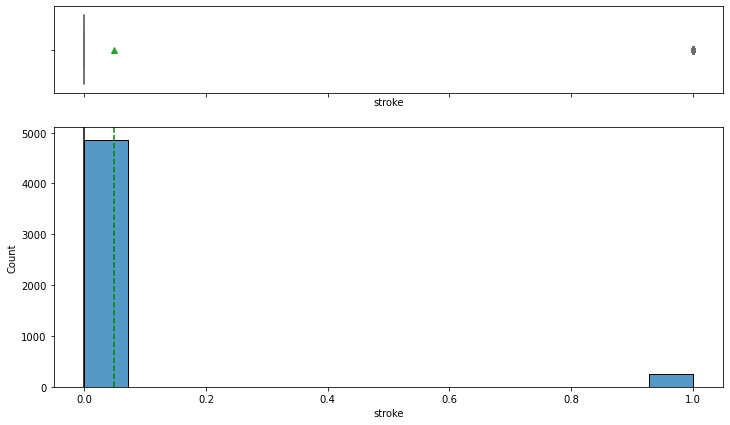

In [27]:
## Numerical data plot (Intergers and floats)
##we will try to understand the underlying distribution of the numerical data series using a Boxplot-Histogram graph

cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in cols:
    histogram_boxplot_quick(df, col)

Observation:

The graphical reprsentation for each column.

Barplot for gender based on pre-cleanup of data 


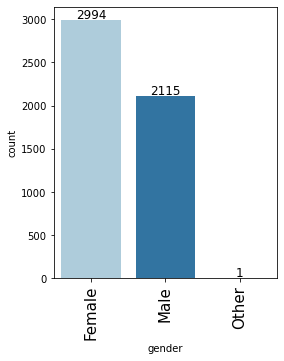

Barplot for ever married based on pre-cleanup of data 


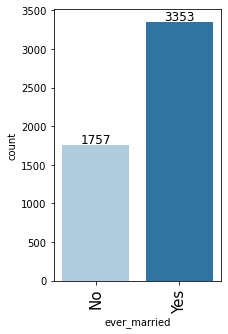

Barplot for work type based on pre-cleanup of data 


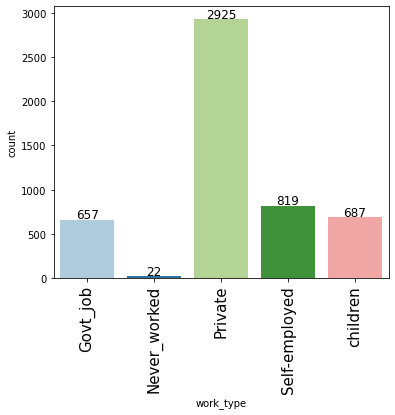

Barplot for Residence type based on pre-cleanup of data 


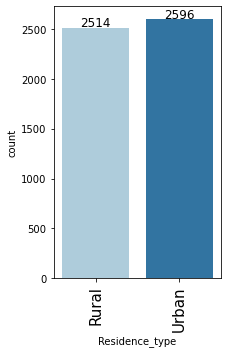

Barplot for smoking status based on pre-cleanup of data 


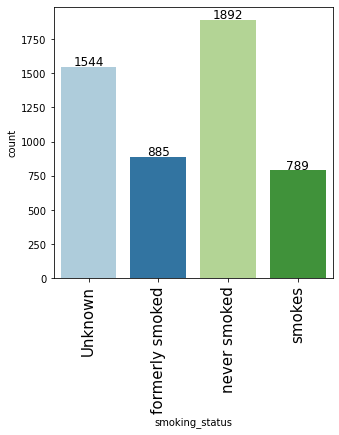

In [28]:
# ## Non-Numerical data plot (Objects and Categoricals)
# we will try to understand the underlying distribution of the categorical data series using a Barplot graph

cols_cat = df.select_dtypes(include=['object']).columns
for col in cols_cat:
    labeled_barplot_quick(df, col)

## Feature Engineering

In [29]:
# let's apply the log transform to see if we can make the distribution of bmi closer to normal
df["log_bmi"] = np.log(df["bmi"])

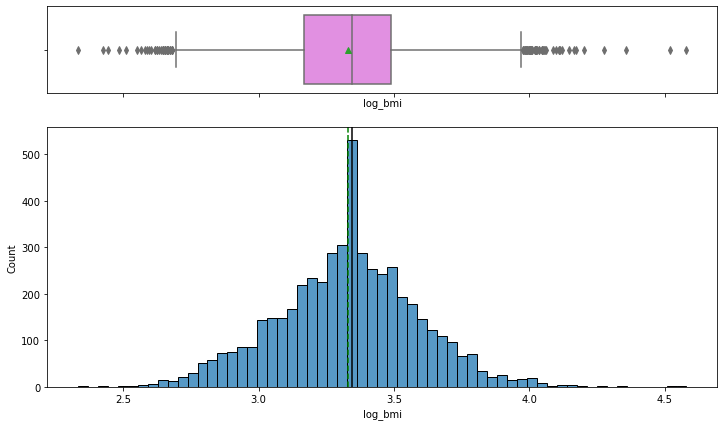

In [31]:
histogram_boxplot(df, 'log_bmi') 

Observation: The bmi column data is right skewed it will likely behave better on the log scale, we will apply a logrithim function to adjust the skewness

In [30]:
df.drop("bmi", axis=1, inplace=True)
df["log_bmi"].describe()

count   5110.00000
mean       3.32981
std        0.25989
min        2.33214
25%        3.16969
50%        3.34639
75%        3.49043
max        4.58088
Name: log_bmi, dtype: float64

In [32]:
# Convert the 'age' column to integer by rounding
df['age'] = df['age'].round().astype('int64')

In [33]:
df["age"].describe()

count   5110.00000
mean      43.22661
std       22.61273
min        0.00000
25%       25.00000
50%       45.00000
75%       61.00000
max       82.00000
Name: age, dtype: float64

Observation:
    
    The above output gives the information of age column 

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
 11  log_bmi            5110 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


Observation:

We can observe that the the datatype has been modified

In [35]:
# let's view a sample of the data
df.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_bmi
4091,43698,Female,27,0,0,No,Govt_job,Rural,65.43000,Unknown,0,3.30322
3150,69979,Male,73,0,0,Yes,Self-employed,Rural,231.43000,smokes,0,3.13549
2668,43039,Female,63,0,0,Yes,Private,Rural,153.60000,formerly smoked,0,3.33220
793,69427,Female,29,0,0,No,Private,Urban,101.28000,never smoked,0,3.12236
798,46683,Female,25,0,0,No,Private,Urban,122.01000,smokes,0,3.29584
749,34612,Male,55,0,0,Yes,Govt_job,Rural,65.12000,never smoked,0,3.40120
3341,51762,Female,59,0,0,Yes,Private,Rural,134.24000,Unknown,0,3.36038
1179,32645,Female,44,0,0,Yes,Private,Rural,97.59000,smokes,0,3.41773
2356,13620,Female,73,0,0,Yes,Self-employed,Urban,100.49000,smokes,0,3.16548
341,38805,Female,37,0,0,Yes,Private,Rural,75.18000,formerly smoked,0,3.87536


# ## Outlier Check
# * Let's check for outliers in the data.

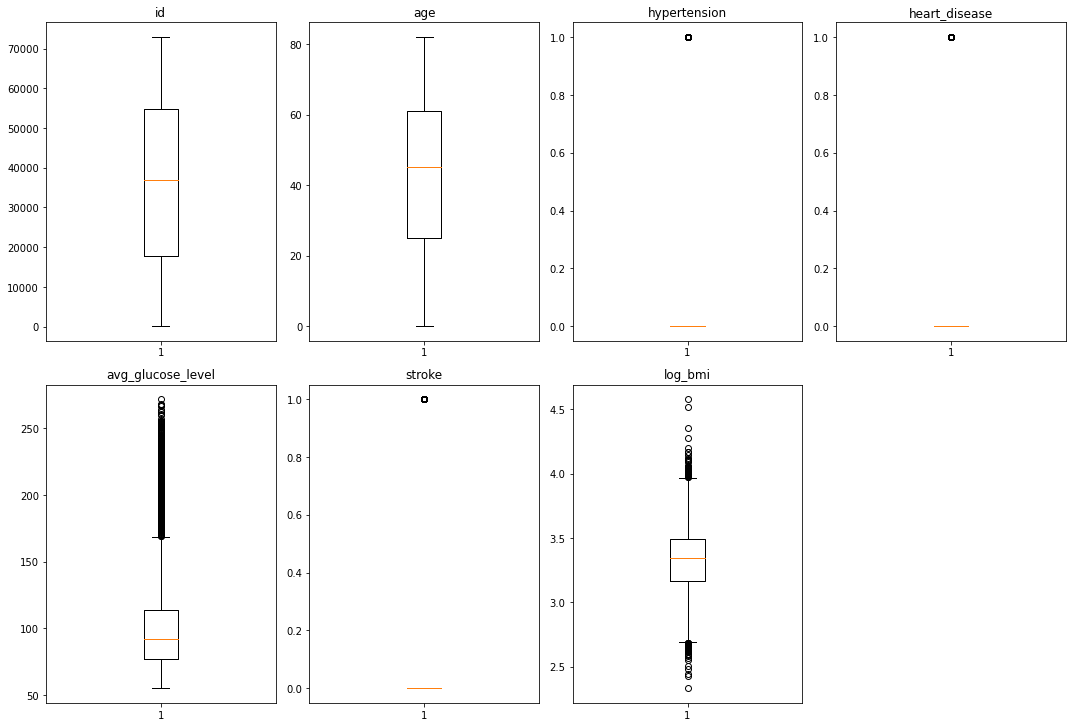

In [36]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [37]:
def frac_outside_1pt5_IQR(x):
    length = 1.5 * np.diff(np.quantile(x, [.25, .75]))
    return np.mean(np.abs(x - np.median(x)) > length)
log_bmi = frac_outside_1pt5_IQR(df["log_bmi"].to_list())
avg_glucose_level = frac_outside_1pt5_IQR(df["avg_glucose_level"].to_list())

print(f"The value {log_bmi} confirms that the log_bmi data points are not within 1.5 times the avg_glucose_level.")  # f-string
print(f"The value {avg_glucose_level} confirms that the avg_glucose_level data points are not within 1.5 times the log_bmi.")  # f-string


The value 0.07103718199608611 confirms that the log_bmi data points are not within 1.5 times the avg_glucose_level.
The value 0.14677103718199608 confirms that the avg_glucose_level data points are not within 1.5 times the log_bmi.


## Bivariate Analysis

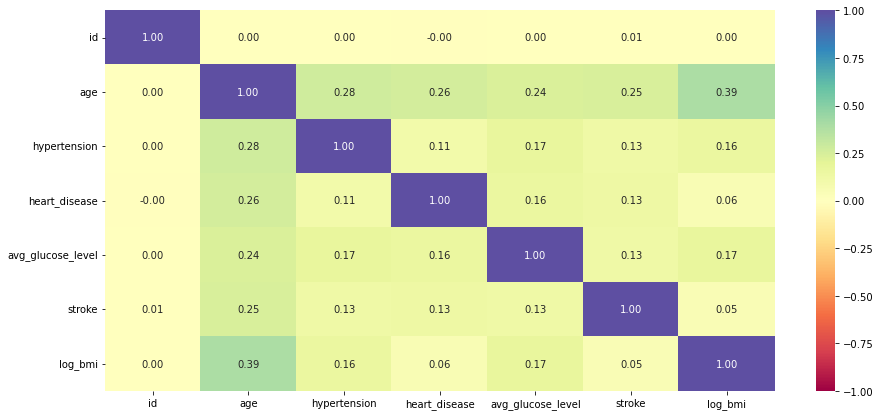

In [38]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation:

This code is useful for quickly visualizing the correlation between numeric columns in your DataFrame. The color intensity and direction help you identify relationships between variables: positive correlations (closer to 1) or negative correlations (closer to -1). A value of 0 indicates no correlation.

In [39]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

The above output gives the count of gender coloumn.

In [40]:
#Drop the unwanted Gender field 'Other'
df = df.drop(df[df['gender']=='Other'].index)
# We are dropping it because the field is irrelevant

In [42]:
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [43]:
df.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_bmi
0,9046,Male,67,0,1,Yes,Private,Urban,228.69000,formerly smoked,1,3.60005
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21000,never smoked,1,3.36361
2,31112,Male,80,0,1,Yes,Private,Rural,105.92000,never smoked,1,3.48124
3,60182,Female,49,0,0,Yes,Private,Urban,171.23000,smokes,1,3.53806
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12000,never smoked,1,3.17805


In [45]:
# Export the clean data (sd_sorted) into csv
df.to_csv(r"C:\Users\Gbeng\OneDrive\Documents\Python Projs\conestoga\stroke\healthcare dataset stroke data.csv", index=False)

Exported the cleaned data into csv file.

# Data Visualization

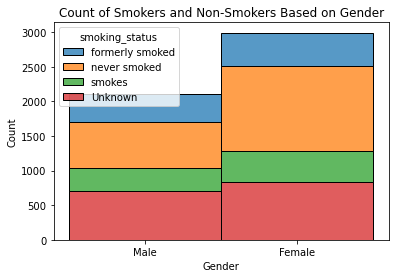

In [46]:
# Create a scattered column to represent the count of smokers and non-smokers for each gender
sns.histplot(x='gender', hue='smoking_status', multiple='stack', data = df)
plt.title('Count of Smokers and Non-Smokers Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Insights:
The above scattered column chart depicts that the highest count of non smokers are female, and least count of smokers are men. The count of female fomerly smokers is greater than that of men.

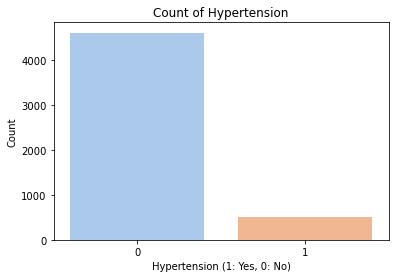

In [47]:
# Count of Hypertension
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', data=df, palette='pastel')
plt.title('Count of Hypertension')
plt.xlabel('Hypertension (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()

Insights: 
 The above graph depicts that the more count of hypertension were not detected for the patient.

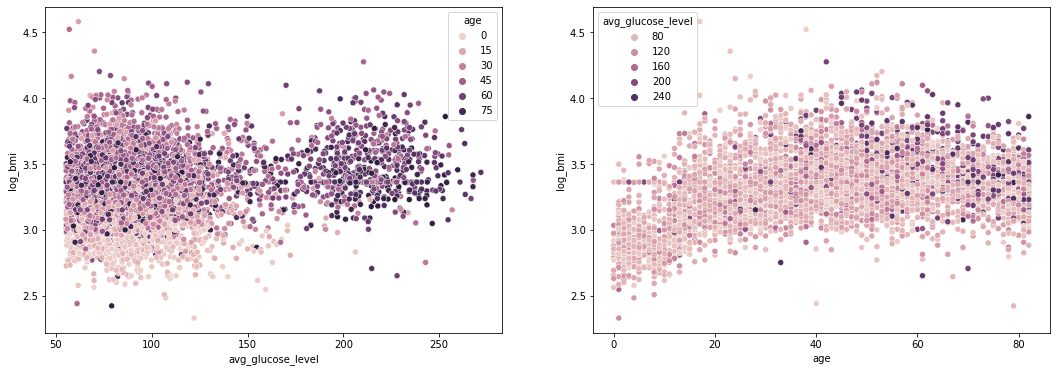

In [48]:
# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot on the first axis
sns.scatterplot(data=df, x="avg_glucose_level", y="log_bmi", hue="age", ax=ax1)

# Plot on the second axis
sns.scatterplot(data=df, x="age", y="log_bmi", hue="avg_glucose_level", ax=ax2)

# Show the plot
plt.show()


Insight:



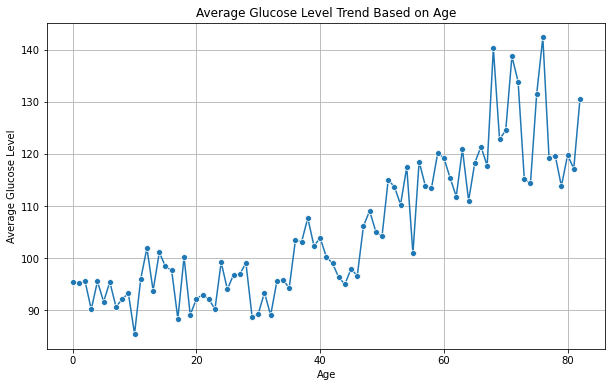

In [49]:
# Group the data by age and calculate the mean glucose level for each age group
age_avg_glucose = df.groupby('age')['avg_glucose_level'].mean().reset_index()

#Create a line chart for the average glucose level trend based on age
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='avg_glucose_level', data=age_avg_glucose, marker='o')
plt.title('Average Glucose Level Trend Based on Age')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.grid(True)
plt.show()


Insights:
 
The above line chart depicts that the maximum average glucose level was observed for ages between 70 to 80 which was above 140. The minimum average glucose level was observed for ages between 5 to 20 which was below 90.

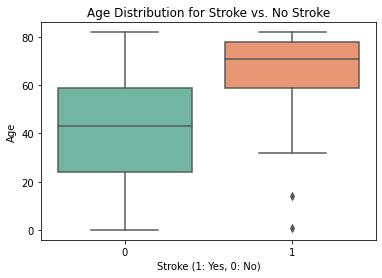

In [50]:
sns.boxplot(x='stroke', y='age', data=df, palette='Set2')
plt.title('Age Distribution for Stroke vs. No Stroke')
plt.xlabel('Stroke (1: Yes, 0: No)')
plt.ylabel('Age')
plt.show()

Insights:
 
The above box plot depicts that the stroke is more likely to be occured between the age 60 and 80 and less likely between 25 and 60.

In [51]:
# Count to know the number of people with stroke
num_stroke = df['stroke'].value_counts()
print(num_stroke)

0    4860
1     249
Name: stroke, dtype: int64


 We have 249 people with stroke and 4860 without stroke

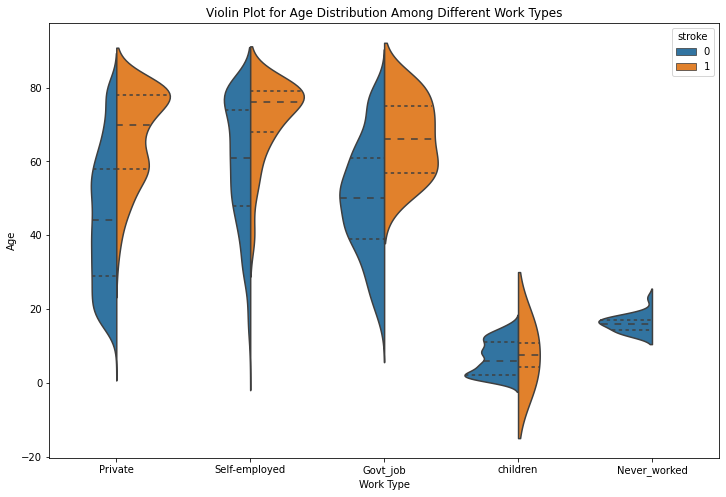

In [52]:
# 4. Violin Plot for Age Distribution Among Different Work Types
plt.figure(figsize=(12, 8))
sns.violinplot(x='work_type', y='age', hue='stroke', data=df, split=True, inner="quart")
plt.title('Violin Plot for Age Distribution Among Different Work Types')
plt.xlabel('Work Type')
plt.ylabel('Age')
plt.show()

Insights:
The above violin plot depicts that the stroke is more likely observed in government work Type patients and less for those patients that never worked. It is also observed that children between 0 to 15 age are also geeting stroke. The observation is that private work type patients are geting stroke more when compared to self-employed.

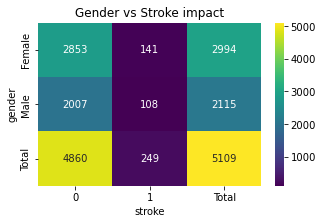

In [53]:
# GENDER VS STROKE IMPACT
ct_gender_stroke = pd.crosstab(df['gender'], df['stroke'], margins=True, margins_name='Total')

# Set up the plot
plt.figure(figsize=(5, 3))
sns.heatmap(ct_gender_stroke, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.title('Gender vs Stroke impact')
plt.xlabel('stroke')
plt.ylabel('gender')
plt.show()

The above plot gives information of data for Gender vs Stroke. It is clearly observed the highest number of stroke got was for females that is about 141 and male was 108.Female also shown no stroke as highest when compared to male.

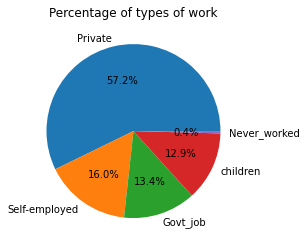

In [54]:
# PERCENTAGE OF TYPES OF WORK
plt.pie(df['work_type'].value_counts(), labels=df['work_type'].unique(), autopct='%1.1f%%');
plt.title('Percentage of types of work');

The above pie chart depicts information percentage of type of work. It is observed that Private has scored highest percentage of 57.2% and never worked data score lowest percentage of 0.4%.

Text(0.5, 1.0, 'Percentage of residence types')

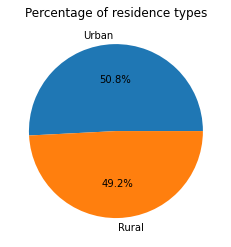

In [55]:
# PERCENTAGE OF RESIDENCE TYPES
plt.pie(df['Residence_type'].value_counts(), labels=df['Residence_type'].unique(), autopct='%1.1f%%');
plt.title('Percentage of residence types')

The above pie chart shows percentage of residence types. It clearly depicts that the urban scores highest portion of 50.8% than rural 49.2%.

# ## Data Preparation for modeling

In [56]:

# * We want to predict the if an individual is likely to have stroke.
# * Before we proceed to build a model, we'll have to encode categorical features.
# * We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   smoking_status     5109 non-null   object 
 9   stroke             5109 non-null   int64  
 10  log_bmi            5109 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 479.0+ KB


In [60]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_bmi
0,Male,67,0,1,Yes,Private,Urban,228.69000,formerly smoked,1,3.60005
1,Female,61,0,0,Yes,Self-employed,Rural,202.21000,never smoked,1,3.36361
2,Male,80,0,1,Yes,Private,Rural,105.92000,never smoked,1,3.48124
3,Female,49,0,0,Yes,Private,Urban,171.23000,smokes,1,3.53806
4,Female,79,1,0,Yes,Self-employed,Rural,174.12000,never smoked,1,3.17805


In [61]:
round(df.describe(include='all'),2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,log_bmi
count,5109,5109.00000,5109.00000,5109.00000,5109,5109,5109,5109.00000,5109,5109.00000,5109.00000
unique,2,NaN,NaN,NaN,2,5,2,NaN,4,NaN,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,never smoked,NaN,NaN
freq,2994,NaN,NaN,NaN,3353,2924,2596,NaN,1892,NaN,NaN
mean,NaN,43.23000,0.10000,0.05000,NaN,NaN,NaN,106.14000,NaN,0.05000,3.33000
std,NaN,22.61000,0.30000,0.23000,NaN,NaN,NaN,45.29000,NaN,0.22000,0.26000
min,NaN,0.00000,0.00000,0.00000,NaN,NaN,NaN,55.12000,NaN,0.00000,2.33000
25%,NaN,25.00000,0.00000,0.00000,NaN,NaN,NaN,77.24000,NaN,0.00000,3.17000
50%,NaN,45.00000,0.00000,0.00000,NaN,NaN,NaN,91.88000,NaN,0.00000,3.35000
75%,NaN,61.00000,0.00000,0.00000,NaN,NaN,NaN,114.09000,NaN,0.00000,3.49000


In [62]:
num_cols = ['age','bmi','avg_glucose_level']
categorical_cols = ['gender','hypertension','heart_disease','ever_married', 'work_type', 'Residence_type','smoking_status','stroke']

In [63]:
for col in categorical_cols :
    print('Column: ',col)
    for index, unique in enumerate(df[col].unique()):
        print(unique,' : ', index)
    print('*'*50)
    

Column:  gender
Male  :  0
Female  :  1
**************************************************
Column:  hypertension
0  :  0
1  :  1
**************************************************
Column:  heart_disease
1  :  0
0  :  1
**************************************************
Column:  ever_married
Yes  :  0
No  :  1
**************************************************
Column:  work_type
Private  :  0
Self-employed  :  1
Govt_job  :  2
children  :  3
Never_worked  :  4
**************************************************
Column:  Residence_type
Urban  :  0
Rural  :  1
**************************************************
Column:  smoking_status
formerly smoked  :  0
never smoked  :  1
smokes  :  2
Unknown  :  3
**************************************************
Column:  stroke
1  :  0
0  :  1
**************************************************


In [64]:
df['gender']=df['gender'].apply(lambda x: 1 if x =='Male' else 0)
df['ever_married']=df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Residence_type']=df['Residence_type'].apply(lambda x: 1 if x =='Urban' else 0)

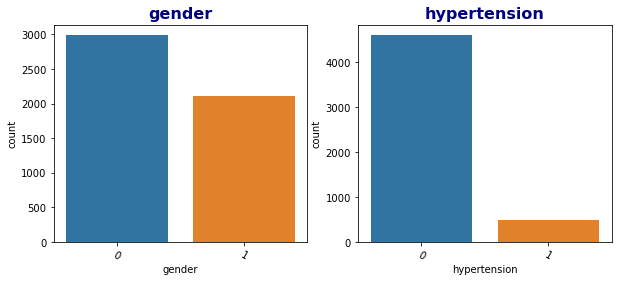

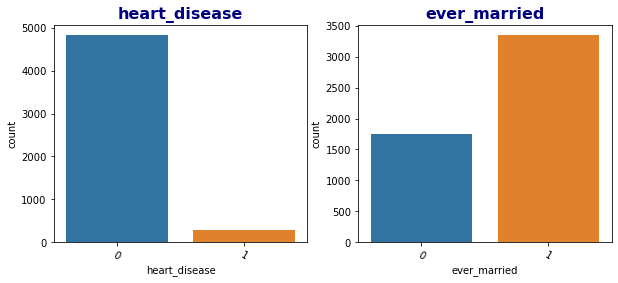

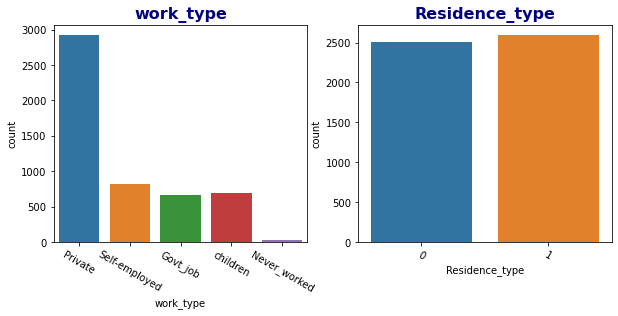

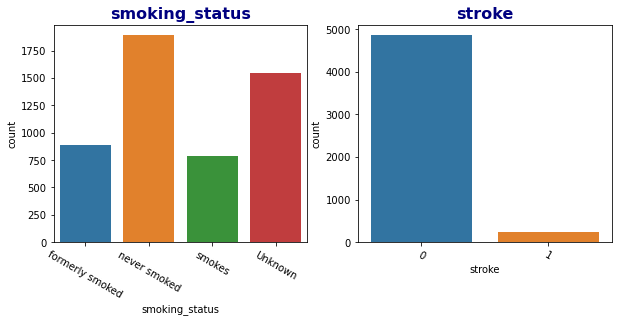

In [65]:
i=0
while i<8 :
    
    # Left Plot
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    #ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
   
    i+=1
    
    # Right Plot
    plt.subplot(1, 2, 2)
    plt.title(categorical_cols[i], size=16, weight='bold', color='navy')
    ax = sns.countplot(x=categorical_cols[i], data=df)
    #ax.bar_label(ax.containers[0])
    ax.tick_params(axis='x', rotation=330)
    i+=1
    plt.show()

## One Hot Encoding

In [66]:
df = pd.concat([df.drop('smoking_status', axis=1), pd.get_dummies(df['smoking_status']).add_prefix('smoking_status_')], axis=1 )
df = pd.concat([df.drop('work_type', axis=1), pd.get_dummies(df['work_type']).add_prefix('work_type_')], axis=1)

Insight: convert the categorical columns 'smoking_status' and 'work_type' into a set of binary columns (one for each category) that can be used in regression or classification models, where categorical variables need to be represented numerically.

In [68]:
df.sample(10)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,log_bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
2105,1,50,1,0,0,1,81.96000,0,3.36361,0,1,0,0,0,0,1,0,0
3944,1,49,0,0,0,1,95.79000,0,3.17805,1,0,0,0,0,0,1,0,0
2824,0,41,0,0,1,0,97.41000,0,3.23868,0,0,1,0,0,0,1,0,0
2062,0,15,0,0,0,1,121.60000,0,3.12676,0,0,1,0,0,0,1,0,0
392,0,39,0,0,1,0,83.51000,0,3.27336,0,0,1,0,0,0,1,0,0
2066,0,30,0,0,1,1,75.88000,0,3.49043,1,0,0,0,0,0,1,0,0
712,1,78,0,0,1,1,56.18000,0,3.29953,0,0,1,0,0,0,1,0,0
4972,0,50,0,0,1,0,112.25000,0,3.07269,1,0,0,0,0,0,1,0,0
2927,1,15,0,0,0,1,113.28000,0,3.16548,0,0,1,0,0,0,0,0,1
623,0,74,0,0,1,0,68.34000,0,3.67122,1,0,0,0,0,0,1,0,0


In [69]:
df.corr()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,log_bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
gender,1.00000,-0.02769,0.02122,0.08568,-0.03017,-0.00610,0.05472,0.00908,-0.01736,0.05956,0.04312,-0.09895,0.01141,-0.01660,0.01149,-0.03250,-0.02604,0.08923
age,-0.02769,1.00000,0.27637,0.26378,0.67908,0.01406,0.23833,0.24522,0.39435,-0.37837,0.23735,0.11921,0.07307,0.12996,-0.07867,0.11668,0.32795,-0.63432
hypertension,0.02122,0.27637,1.00000,0.10829,0.16419,-0.00798,0.17454,0.12789,0.16319,-0.14155,0.05902,0.06502,0.03121,0.01766,-0.02161,-0.00536,0.11542,-0.12953
heart_disease,0.08568,0.26378,0.10829,1.00000,0.11460,0.00304,0.16191,0.13490,0.05814,-0.06677,0.06694,-0.02189,0.04403,0.00131,-0.01572,0.00007,0.08674,-0.09165
ever_married,-0.03017,0.67908,0.16419,0.11460,1.00000,0.00599,0.15533,0.10830,0.38690,-0.33233,0.17196,0.10266,0.10513,0.13396,-0.09087,0.15410,0.19264,-0.54466
Residence_type,-0.00610,0.01406,-0.00798,0.00304,0.00599,1.00000,-0.00478,0.01541,-0.00070,-0.00217,0.00809,-0.02462,0.02718,0.01306,0.02285,-0.01800,0.01051,-0.00239
avg_glucose_level,0.05472,0.23833,0.17454,0.16191,0.15533,-0.00478,1.00000,0.13199,0.17413,-0.09504,0.06780,0.02401,0.01772,0.01391,-0.01467,0.01645,0.06277,-0.10220
stroke,0.00908,0.24522,0.12789,0.13490,0.10830,0.01541,0.13199,1.00000,0.05341,-0.05592,0.06468,-0.00416,0.00892,0.00266,-0.01489,0.01193,0.06215,-0.08389
log_bmi,-0.01736,0.39435,0.16319,0.05814,0.38690,-0.00070,0.17413,0.05341,1.00000,-0.31268,0.12239,0.12521,0.10192,0.09373,-0.03193,0.23455,0.09113,-0.52398
smoking_status_Unknown,0.05956,-0.37837,-0.14155,-0.06677,-0.33233,-0.00217,-0.09504,-0.05592,-0.31268,1.00000,-0.30103,-0.50469,-0.28125,-0.09747,0.00880,-0.20993,-0.10631,0.51272


Text(0.5, 1.0, 'Factor Correlation')

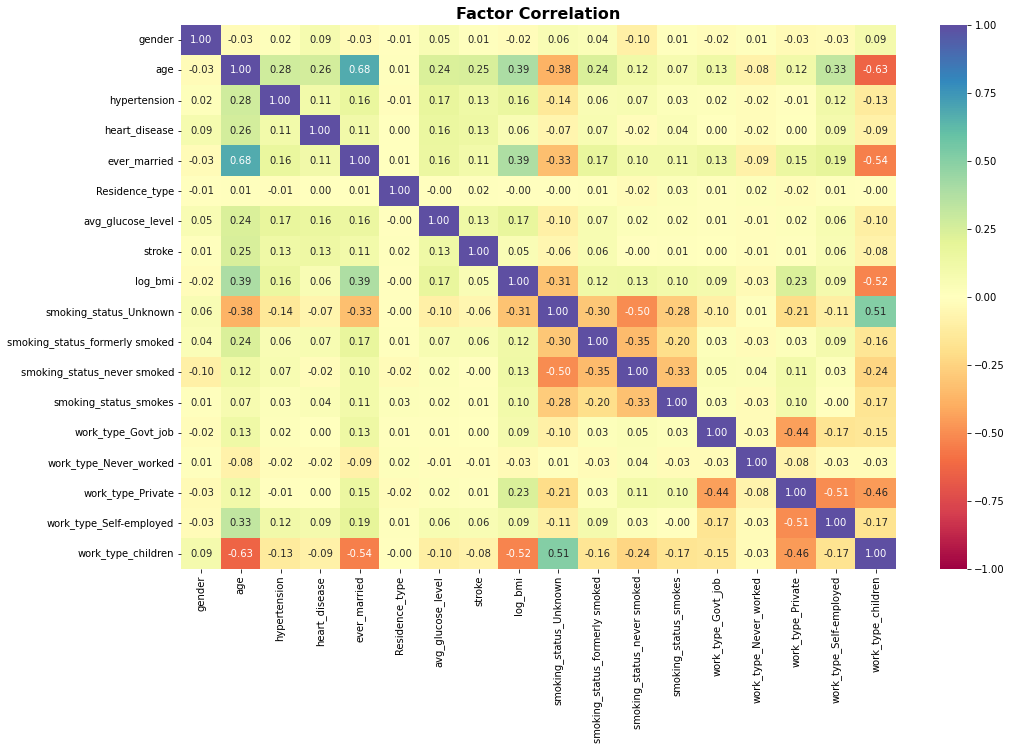

In [70]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),  annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title("Factor Correlation", fontweight = "bold", fontsize=16)

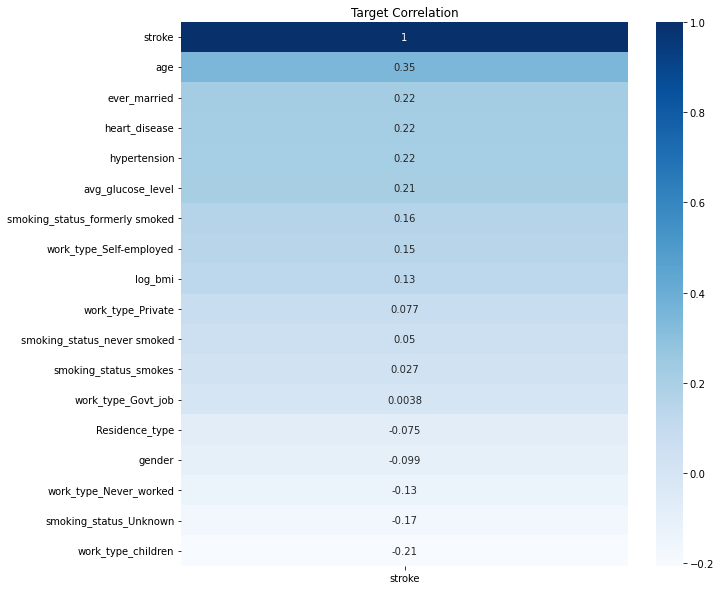

In [71]:
#General overview of how all variables are correlated with each other and with the target variable
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr.corr()[['stroke']].sort_values(by='stroke', ascending=False), annot = True, cmap = 'Blues')
plt.title('Target Correlation')
plt.show()

#### Gender and Other Variables:

Gender has a slight positive correlation with heart disease (0.08568) and a negative correlation with 'smoking_status_never smoked' (-0.09895).

#### Age:

Strong positive correlation with 'ever_married' (0.67908), indicating older individuals are more likely to be married.
Positive correlation with hypertension (0.27637) and heart disease (0.26378), suggesting that these conditions are more prevalent in older individuals.
Negative correlation with 'work_type_children' (-0.63432), indicating that this category probably represents younger individuals.
#### Hypertension and Heart Disease:

Both have positive correlations with age and each other, indicating these conditions are more common in older individuals and often co-occur.
#### Average Glucose Level:

Shows a moderate positive correlation with age (0.23833) and stroke (0.13199).
#### Stroke:

Shows positive correlations with age (0.24522), hypertension (0.12789), heart disease (0.13490), and average glucose level (0.13199).
The correlation with 'log_bmi' is positive but weaker (0.05341).
#### Log BMI:

Positively correlated with age (0.39435) and 'ever_married' (0.38690), indicating higher BMI in older and married individuals.
Negatively correlated with 'smoking_status_Unknown' (-0.31268) and 'work_type_children' (-0.52398).
#### Smoking Status:

Various smoking status categories show different correlations with other variables, reflecting the distribution of smoking habits across different demographics.
#### Work Type:

Different work types show varying correlations with age, suggesting different age groups are represented in different work categories.
'Work_type_Private' has a positive correlation with 'log_bmi' (0.23455), indicating a possible trend in BMI among individuals working in private sectors.

It's important to note that correlation does not imply causation. While two variables may be correlated, it doesn't mean that one variable causes the other to change.
High absolute values of correlation (close to 1 or -1) indicate strong relationships.

## Define the dependent and independent variables

In [72]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

print(X.head())
print(y.head())

   gender  age  hypertension  heart_disease  ever_married  Residence_type  \
0       1   67             0              1             1               1   
1       0   61             0              0             1               0   
2       1   80             0              1             1               0   
3       0   49             0              0             1               1   
4       0   79             1              0             1               0   

   avg_glucose_level  log_bmi  smoking_status_Unknown  \
0          228.69000  3.60005                       0   
1          202.21000  3.36361                       0   
2          105.92000  3.48124                       0   
3          171.23000  3.53806                       0   
4          174.12000  3.17805                       0   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                               1                            0   
1                               0                            1

In [73]:
X

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,log_bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,1,67,0,1,1,1,228.69000,3.60005,0,1,0,0,0,0,1,0,0
1,0,61,0,0,1,0,202.21000,3.36361,0,0,1,0,0,0,0,1,0
2,1,80,0,1,1,0,105.92000,3.48124,0,0,1,0,0,0,1,0,0
3,0,49,0,0,1,1,171.23000,3.53806,0,0,0,1,0,0,1,0,0
4,0,79,1,0,1,0,174.12000,3.17805,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80,1,0,1,1,83.75000,3.36361,0,0,1,0,0,0,1,0,0
5106,0,81,0,0,1,1,125.20000,3.68888,0,0,1,0,0,0,0,1,0
5107,0,35,0,0,1,0,82.99000,3.42100,0,0,1,0,0,0,0,1,0
5108,1,51,0,0,1,0,166.29000,3.24259,0,1,0,0,0,0,1,0,0


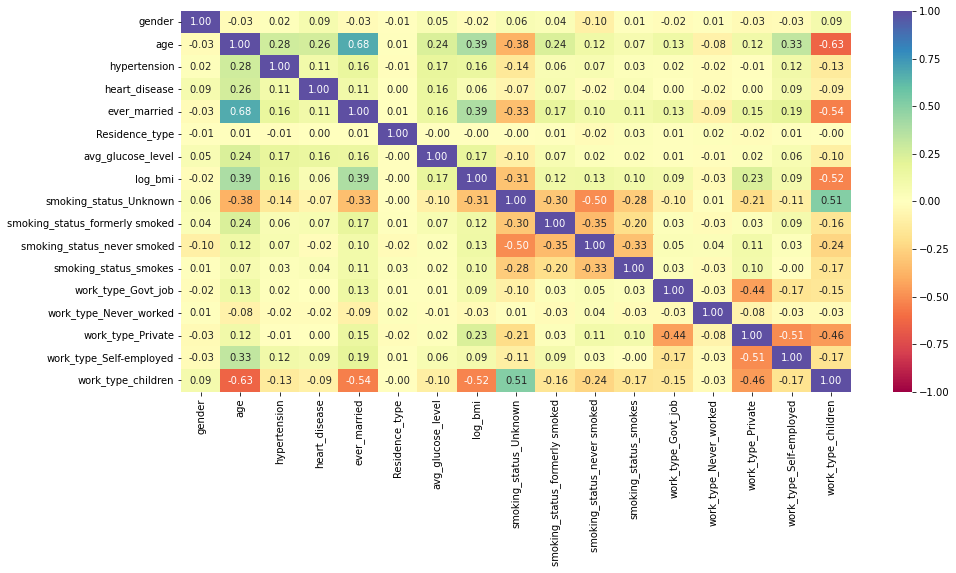

In [74]:
X_cols_list = X.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(
    X[X_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [75]:
# Code to split the data into train test in the ratio 70:30 with random_state = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3576, 17)
Shape of test set :  (1533, 17)
Percentage of classes in training set:
0   0.95358
1   0.04642
Name: stroke, dtype: float64
Percentage of classes in test set:
0   0.94586
1   0.05414
Name: stroke, dtype: float64


## Linear Regression

In [76]:
# adding constant to the train data
X_lg_train = sm.add_constant(X_train)
# adding constant to the test data
X_lg_test = sm.add_constant(X_test) ## add contant to the test data

In [77]:
X_lg_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 4314 to 235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           3576 non-null   float64
 1   gender                          3576 non-null   int64  
 2   age                             3576 non-null   int64  
 3   hypertension                    3576 non-null   int64  
 4   heart_disease                   3576 non-null   int64  
 5   ever_married                    3576 non-null   int64  
 6   Residence_type                  3576 non-null   int64  
 7   avg_glucose_level               3576 non-null   float64
 8   log_bmi                         3576 non-null   float64
 9   smoking_status_Unknown          3576 non-null   uint8  
 10  smoking_status_formerly smoked  3576 non-null   uint8  
 11  smoking_status_never smoked     3576 non-null   uint8  
 12  smoking_status_smokes           

In [78]:
# Code to fit OLS model
olsmodel = sm.OLS(y_train, X_lg_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     20.18
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           3.97e-53
Time:                        18:54:10   Log-Likelihood:                 645.98
No. Observations:                3576   AIC:                            -1260.
Df Residuals:                    3560   BIC:                            -1161.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# Interpreting the Regression Results:


#### Adjusted. R-squared: It reflects the fit of the model.  Adjusted R-squared values generally range from 0 to 0, where a higher value generally indicates a better fit, assuming certain conditions are met.
* In our case, R-squared: 0.078. This value indicates that approximately 7.8% of the variability in the dependent variable ('stroke') is explained by the model. This is relatively low, suggesting that the model does not explain a large portion of the variance in the outcome. The Adjusted R-squared: 0.074. Similar to R-squared, but adjusted for the number of predictors in the model. It's slightly lower than R-squared, which is expected as it penalizes the addition of non-informative predictors.

#### const coefficient: It is the Y-intercept. Coefficient of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
* In our case, the value for const coefficient is -0.0412 
* Condition Number: 1.18e+18. A high condition number indicates potential multicollinearity or numerical issues. This suggests that some independent variables are highly correlated, which can affect the stability and interpretation of the model coefficients.

## TEST FOR MULTICOLLINEARITY
We will test for multicollinearity using VIF.
Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

Variance Inflation Factor (VIF): Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient βk is "inflated" by the existence of correlation among the predictor variables in the model.

If VIF is 1, then there is no correlation among the kth predictor and the remaining predictor variables, and hence, the variance of βk is not inflated at all. General Rule of thumb:

General Rule of thumb:
* If VIF is 1 then there is no correlation between the kth predictor and the remaining predictor variables.
* If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
* If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [80]:
checking_vif(X_lg_train)

,feature,VIF
0,const,0.00000
1,gender,1.02473
2,age,2.83113
3,hypertension,1.11433
4,heart_disease,1.11870
5,ever_married,2.01637
6,Residence_type,1.00296
7,avg_glucose_level,1.11490
8,log_bmi,1.45697
9,smoking_status_Unknown,inf


The Variance Inflation Factor (VIF) is a measure used to detect the presence of multicollinearity in regression models. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. This can make it difficult to determine the individual effect of each variable on the dependent variable. 
#### VIF Values:

* A VIF of 1 indicates no correlation between the independent variable and any other variables.
* A VIF between 1 and 5 generally indicates a moderate level of correlation, but not severe enough to cause concern.
* A VIF greater than 5 can suggest a problematic amount of correlation that may distort the regression coefficients and their significance.
#### Specific Interpretations:

* const (VIF = 0.00000): This is likely the intercept term in your model. It's normal for it to have a VIF of zero.
* Variables like 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', and 'log_bmi' have VIFs well below 5, suggesting that they do not have problematic multicollinearity.
* 'age' (VIF = 2.83113) and 'ever_married' (VIF = 2.01637) have the highest VIFs among these, indicating some level of correlation, but not enough to be overly concerning.
* Variables related to 'smoking_status' and 'work_type' (marked as 'inf') have infinite VIFs. This is indicative of perfect multicollinearity. This usually happens when the dummy variables are created without dropping one category (to avoid the dummy variable trap) or when a variable can be perfectly predicted by a combination of other variables.
#### Actions and Considerations:

* The infinite VIFs for categories of 'smoking_status' and 'work_type' suggest that there might be an issue with how these dummy variables were created. Normally, one category should be dropped to serve as a reference category, which prevents perfect multicollinearity.
* For the variables with high but not infinite VIFs, it's usually safe to proceed, but it's important to be mindful of the potential for some level of multicollinearity impacting the interpretation of coefficients.

In [81]:
# initial list of columns
cols = X_train.columns.tolist()

In [82]:
# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.5:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'log_bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed']


In [83]:
checking_vif(X_train)

,feature,VIF
0,gender,1.02473
1,age,2.83113
2,hypertension,1.11433
3,heart_disease,1.11870
4,ever_married,2.01637
5,Residence_type,1.00296
6,avg_glucose_level,1.11490
7,log_bmi,1.45697
8,smoking_status_Unknown,inf
9,smoking_status_formerly smoked,inf


Switching to a classification model could indeed be more appropriate and potentially more effective for predicting stroke, which is a binary outcome (occurrence or non-occurrence of stroke).

# Logistic Regression (with Scikit-learn library)

#### How to reduce the losses?
Hospital would want F1 Score to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
 
First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [84]:
scaler = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(scaler,columns=X.columns)
X.describe()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,log_bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
count,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000,5109.00000
mean,0.41398,0.52719,0.09748,0.05402,0.65629,0.50812,0.23553,0.44367,0.30221,0.17303,0.37033,0.15443,0.12860,0.00431,0.57232,0.16031,0.13447
std,0.49259,0.27578,0.29663,0.22608,0.47499,0.49998,0.20905,0.11557,0.45926,0.37831,0.48294,0.36140,0.33479,0.06549,0.49479,0.36692,0.34119
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.30488,0.00000,0.00000,0.00000,0.00000,0.10211,0.37245,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,0.00000,0.54878,0.00000,0.00000,1.00000,1.00000,0.16970,0.45103,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
75%,1.00000,0.74390,0.00000,0.00000,1.00000,1.00000,0.27223,0.51508,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
max,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5109 non-null   float64
 1   age                             5109 non-null   float64
 2   hypertension                    5109 non-null   float64
 3   heart_disease                   5109 non-null   float64
 4   ever_married                    5109 non-null   float64
 5   Residence_type                  5109 non-null   float64
 6   avg_glucose_level               5109 non-null   float64
 7   log_bmi                         5109 non-null   float64
 8   smoking_status_Unknown          5109 non-null   float64
 9   smoking_status_formerly smoked  5109 non-null   float64
 10  smoking_status_never smoked     5109 non-null   float64
 11  smoking_status_smokes           5109 non-null   float64
 12  work_type_Govt_job              51

In [86]:
# Code to split the data into train test in the ratio 70:30 with random_state = 1
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3576, 17)
Shape of test set :  (1533, 17)
Percentage of classes in training set:
0   0.95358
1   0.04642
Name: stroke, dtype: float64
Percentage of classes in test set:
0   0.94586
1   0.05414
Name: stroke, dtype: float64


In [87]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
    'class_weight': [None, 'balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'multi_class': ['ovr', 'multinomial']
}
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=10, verbose=10)

param_grid: This is a dictionary that defines the grid of hyperparameters to be tested. It includes several parameters of the logistic regression model:

* penalty: Specifies the norm used in the penalization ('l1' or 'l2'). L1 regularization can lead to sparsity (zero coefficients), while L2 regularization is more about shrinking the coefficients.
* C: The inverse of regularization strength. Smaller values specify stronger regularization. Here, a range of values from 0.001 to 100 is provided.
* class_weight: Used to handle imbalanced classes. If 'balanced', the class weights will be adjusted inversely proportional to class frequencies.
* solver: Algorithm to use for optimization ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'). Different solvers are suitable for different types of data and different penalties.
* max_iter: Maximum number of iterations taken for the solvers to converge. The values 100, 500, and 1000 are being considered.
* multi_class: Determines how the algorithm handles a multi-class problem ('ovr' for one-vs-rest or 'multinomial' for true multinomial logistic regression).

In [88]:
get_ipython().run_cell_magic('capture', 'no_output', 't1 = datetime.now()\ngrid_search = grid_search.fit(X_train, y_train)\nt2 = datetime.now()\n')

In [89]:
delta = t2-t1
lr_time = round(delta.total_seconds(), 5)
print(lr_time)

600.39041


In [91]:
grid_search.best_estimator_

LogisticRegression(C=0.001, multi_class='ovr', penalty='l1', solver='liblinear')

In [95]:
clf = grid_search.best_estimator_
predict_y = clf.predict(X_test)

In [98]:
def plot_confusion_matrix(y_test, y_prediction):
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Greens")
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Dont Have Stroke', 'Had Stroke'])
    ax.yaxis.set_ticklabels(['Dont Have Stroke', 'Had Stroke']) 
    plt.show()

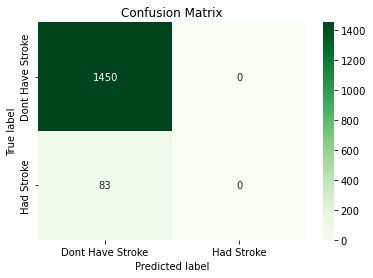

In [99]:
plot_confusion_matrix(y_test, predict_y)

In [100]:
cr = metrics.classification_report(y_test, predict_y)
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



There are two classes: class '0' and class '1'. Theserepresents binary outcomes of "no stroke" (0) and "stroke" (1), since the context is predicting strokes.

* Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For class '0', the precision is 0.95, meaning that 95% of instances predicted as class '0' are correct. For class '1', the precision is 0.00, indicating that none of the instances predicted as class '1' are correct.

* Recall: Recall (or sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class. The recall for class '0' is 1.00, meaning the model correctly identified all instances of class '0'. The recall for class '1' is 0.00, meaning the model failed to correctly identify any of the actual instances of class '1'.

* F1-Score: F1-score is the weighted average of precision and recall. It's useful in cases where one wants to balance precision and recall. For class '0', the F1-score is 0.97, which is high, reflecting the good balance between precision and recall. For class '1', the F1-score is 0.00, indicating a poor balance between precision and recall (both were 0).

* Support: This number indicates the actual occurrences of each class in the test set. There were 1450 instances of class '0' and 83 instances of class '1'.

* Accuracy: The overall accuracy of the model is 0.95, meaning that 95% of all predictions were correct. However, this high accuracy is misleading due to the class imbalance (majority of instances belong to class '0').

#### Macro Avg and Weighted Avg:

* Macro Average: Calculated by averaging the precision, recall, and F1-score for each class without considering the support (class imbalance). The macro averages for precision, recall, and F1-score are 0.47, 0.50, and 0.49, respectively. These values are low, indicating poor overall performance across both classes.
* Weighted Average: Takes into account the support of each class. The weighted averages are higher (0.89 for precision, 0.95 for accuracy, and 0.92 for F1-score), but these are mainly influenced by the dominant class '0'.

### Logistic Regression (with statsmodel library)

In [102]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.18979109,  1.05123809, -0.32863749, ...,  0.86444434,
        -0.43693145, -0.39415678],
       [-0.84048369,  0.78588576, -0.32863749, ..., -1.15681248,
         2.28868854, -0.39415678],
       [ 1.18979109,  1.62616815, -0.32863749, ...,  0.86444434,
        -0.43693145, -0.39415678],
       ...,
       [-0.84048369, -0.36397434, -0.32863749, ..., -1.15681248,
         2.28868854, -0.39415678],
       [ 1.18979109,  0.34363188, -0.32863749, ...,  0.86444434,
        -0.43693145, -0.39415678],
       [-0.84048369,  0.03405416, -0.32863749, ..., -1.15681248,
        -0.43693145, -0.39415678]])

In [103]:
# Code to split the data into train test in the ratio 70:30 with random_state = 1
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=1)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3576, 17)
Shape of test set :  (1533, 17)
Percentage of classes in training set:
0   0.95358
1   0.04642
Name: stroke, dtype: float64
Percentage of classes in test set:
0   0.94586
1   0.05414
Name: stroke, dtype: float64


In [104]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [105]:
# Adding a constant to the model (Statsmodels doesn't add it by default)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [106]:
# Initialize and fit the model
lg = sm.Logit(y_train, X_train_sm.astype(float))
result_sm = lg.fit(disp=False)

In [107]:
# Predictions and evaluation
predictions_sm = result_sm.predict(X_test_sm) >= 0.5  # Converting probabilities to class labels
print("Statsmodels Logistic Regression:")
print(classification_report(y_test, predictions_sm))

Statsmodels Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1450
           1       0.00      0.00      0.00        83

    accuracy                           0.95      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.95      0.92      1533



In [108]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    Plots the confusion matrix with percentages for a Statsmodels Logit model.

    Args:
    model (Statsmodels Logit model): The fitted logistic regression model.
    predictors (DataFrame): DataFrame containing the predictors.
    target (Series): Series containing the target variable.
    threshold (float): Threshold for classifying the observation as class 1. Default is 0.5.
    """
    # Adding a constant to the predictors if not already added
    predictors = sm.add_constant(predictors, has_constant='add')

    # Get the predicted probabilities and convert to binary outcomes
    y_pred_prob = model.predict(predictors)
    y_pred = (y_pred_prob > threshold).astype(int)

    # Compute confusion matrix
    cm = confusion_matrix(target, y_pred)

    # Calculate percentages for each cell in the confusion matrix
    labels = np.asarray(
        [
            "{0:0.0f}\n{1:.2%}".format(value, value/cm.sum())
            for value in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting using Seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title("Confusion Matrix")
    plt.show()

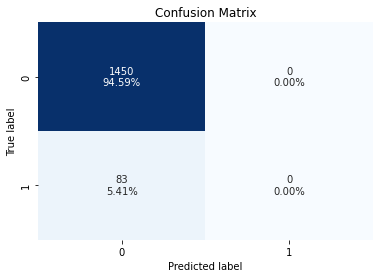

In [109]:
confusion_matrix_statsmodels(result_sm, X_test, y_test)


# Actionable Insights and Conclusion

In this Project Respectively, We have tried to a predict classification problem in Stroke Dataset by a variety of models to classify Stroke predictions in the context of determining whether anybody is likely to get Stroke based on the input parameters like gender, age, bmi and various test results or not.

We have made the detailed exploratory analysis (EDA). Missing values are replaced in the Dataset by using Simple Imputer with Mean. We have decided which metrics will be used. 

We have analysed both target and features in detail. We have transformed categorical variables into integer by using Label Encoder, so we can use them in the models. We have cross-checked the models obtained from train sets by applying cross validation for each model performance.

By checking with all the scores like R-Squared, F1_score, Precision, Recall and Accuracy. Ran model quality check with Variance Inflation Factor (VIF) to check for multicolinearity

We have examined the feature importance of some models.Lastly we have examined the results of all models visually with respect to select the best one for the problem in hand. 
 

### Linear Regression

* The model's low R-squared values indicate limited predictive power for stroke occurrence.
* Certain factors like age, hypertension, heart disease, and average glucose level are significant predictors of stroke, aligning with medical understanding.
* The presence of non-normal residuals and a high condition number raises concerns about the model's assumptions and reliability. It suggests the need for further investigation, possibly model refinement or different modeling approaches.
* Multicollinearity, indicated by the high condition number, should be addressed, possibly by removing or combining correlated predictors.
* The statistical significance of the model does not imply a strong predictive ability, given the low R-squared values. The practical significance of the model in predicting stroke should be carefully evaluated.

### Logistic Regression
Both logistic regression result are identical.Both show that the model performs well in predicting the majority class (class 0) but fails to predict the minority class (class 1). While the models shows high accuracy, this is primarily because it performs well on the majority class ('0') but fails to correctly predict any instance of the minority class ('1'). This is a common issue in imbalanced datasets. The model's inability to identify class '1' instances (precision and recall of 0 for class '1') is a significant concern, especially in applications like stroke prediction where failing to identify actual cases (false negatives) can be very costly.

To improve the model, techniques for handling imbalanced data, such as SMOTE (Synthetic Minority Over-sampling Technique), adjusted class weights, or different evaluation metrics like the ROC-AUC curve, should be considered.

### Comparison with Linear Regression Result:
* Model Type: The linear regression model is designed for continuous outcomes and predicts a value, whereas the logistic regression model is designed for binary outcomes and predicts a probability of class membership.
* Performance Metrics: Linear regression uses metrics like R-squared, whereas logistic regression uses precision, recall, and F1-score. The metrics are not directly comparable due to the different nature of the models.

### Interpretation of Results:
* The linear regression model had a low R-squared value, indicating it explained only a small portion of the variance in the outcome (stroke occurrence).
* The logistic regression models, while showing high accuracy, failed to predict the positive class (class 1) at all. This suggests that while they might be better suited for a binary classification task, they still struggle with class imbalance.

## Conclusion:
* Both the logistic regression and linear regression models have limitations in predicting stroke occurrence.
* The logistic regression models, despite being more appropriate for a binary outcome, suffer significantly from the imbalanced dataset, failing to predict the minority class entirely.
* Addressing class imbalance and considering different modeling or resampling techniques might be necessary to improve the prediction of the minority class in logistic regression.
* For linear regression, the low R-squared value suggests a need to reconsider the model's variables or to try a different modeling approach altogether.